In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from numpy import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
SEED = 123143
random.seed(SEED)

In [2]:
resultado_exames = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')
resultado_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
valores_exames = resultado_exames.drop(columns = ['id', 'diagnostico', 'exame_33'])
diagnostico = resultado_exames.diagnostico

In [4]:
treino_x,  teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size = 0.3)

In [5]:
classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print('Resultado do score: ',classificador.score(teste_x,teste_y))

Resultado do score:  0.9239766081871345


In [6]:
classificador_dummy = DummyClassifier(strategy = 'most_frequent')
classificador_dummy.fit(treino_x, treino_y)
print('Resultado do score classificador: ',classificador_dummy.score(teste_x,teste_y))

Resultado do score classificador:  0.6666666666666666


In [25]:
padronizar= StandardScaler()
padronizar.fit(valores_exames)
valores_exames_v2 = padronizar.transform(valores_exames)
valores_exames_v2

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

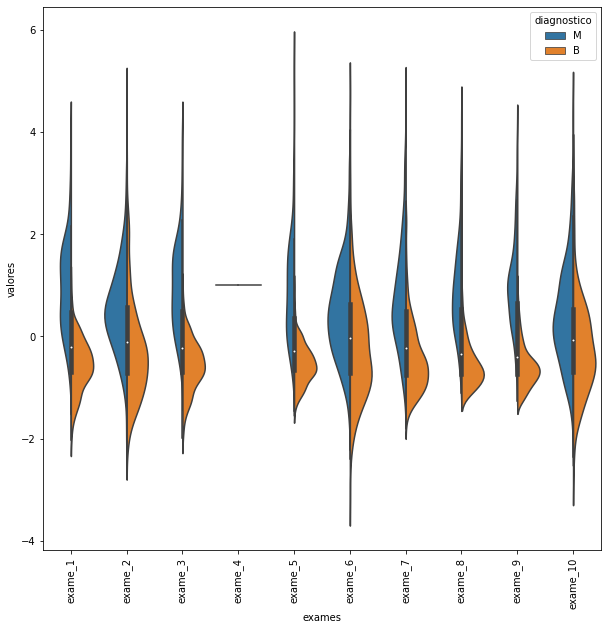

In [27]:
padronizar= StandardScaler()
padronizar.fit(valores_exames)
valores_exames_v2 = padronizar.transform(valores_exames)
valores_exames_v2
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames.keys())
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis= 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',
                     var_name = 'exames', 
                    value_name = 'valores')

plt.figure(figsize=(10,10))
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10'),
  Text(10, 0, 'exame_11'),
  Text(11, 0, 'exame_12'),
  Text(12, 0, 'exame_13'),
  Text(13, 0, 'exame_14'),
  Text(14, 0, 'exame_15'),
  Text(15, 0, 'exame_16'),
  Text(16, 0, 'exame_17'),
  Text(17, 0, 'exame_18'),
  Text(18, 0, 'exame_19'),
  Text(19, 0, 'exame_20'),
  Text(20, 0, 'exame_21'),
  Text(21, 0, 'exame_22'),
  Text(22, 0, 'exame_23'),
  Text(23, 0, 'exame_24'),
  Text(24, 0, 'exame_25'),
  Text(25, 0, 'exame_26'),
  Text(26, 0, 'exame_27'),
  Text(27, 0, 'exame_28'),
  Text(28, 0, 'exame_29'),
  Text(29, 0, 'exame_30'),
  Text(30, 0, 'exame_31'),
  Text(31, 0, 'exame_32')])

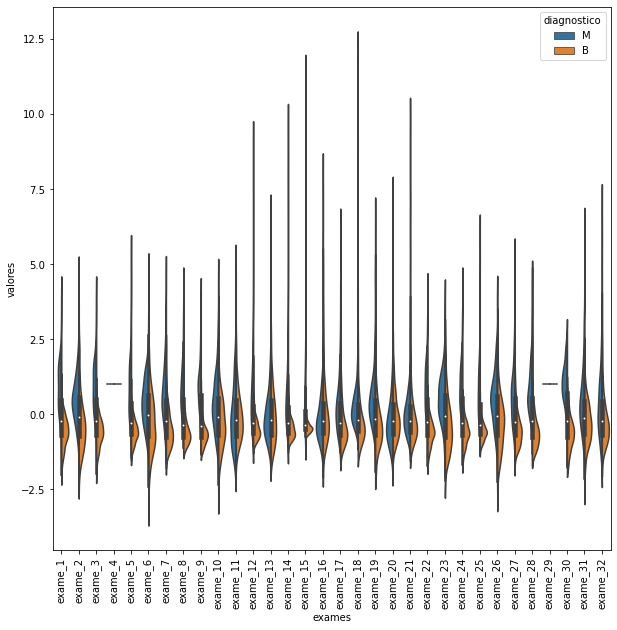

In [31]:
padronizar= StandardScaler()
padronizar.fit(valores_exames)
valores_exames_v2 = padronizar.transform(valores_exames)
valores_exames_v2
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames.keys())
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,:]], axis= 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',
                     var_name = 'exames', 
                    value_name = 'valores')

plt.figure(figsize=(10,10))
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)
plt.xticks(rotation = 90)

<AxesSubplot:>

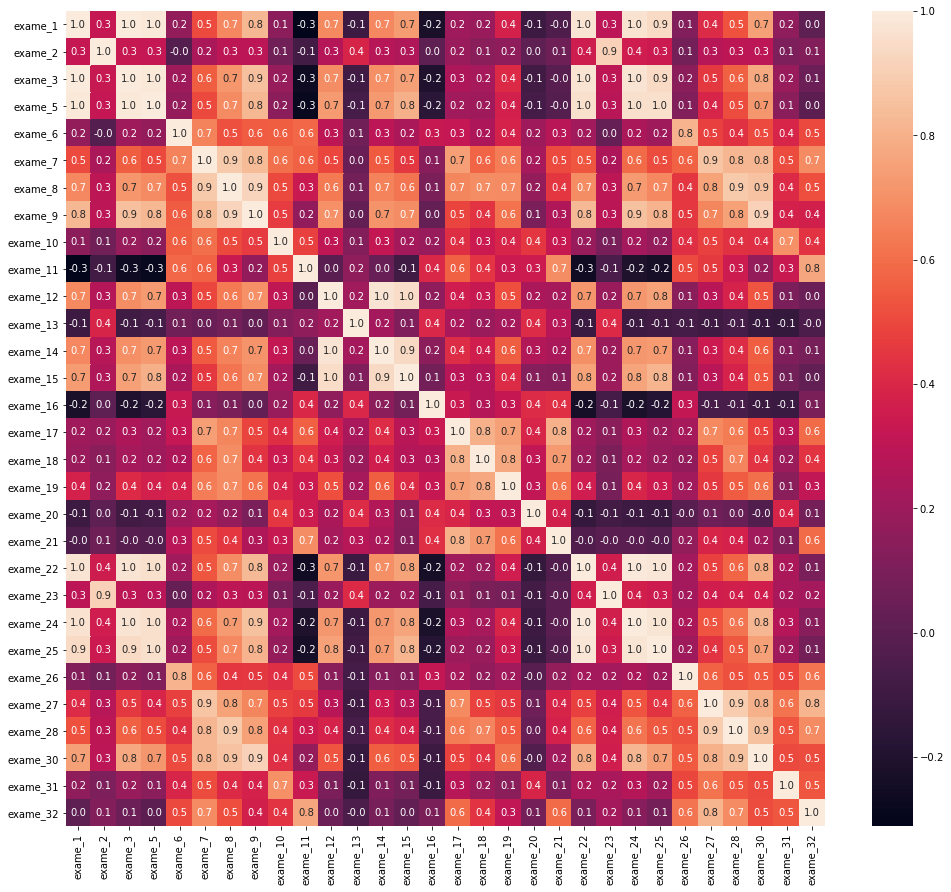

In [38]:
mat_cor = valores_exames_v2.drop(columns = ['exame_4', 'exame_29']).corr()
plt.figure(figsize = (17,15))
sns.heatmap(mat_cor, annot = True, fmt = '.1f')

In [39]:
mat_cor_v1 = mat_cor[mat_cor>0.9]
mat_cor_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,0.987357,NaN,NaN,NaN,NaN,NaN,NaN,...,0.969539,NaN,0.965137,0.941082,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,...,0.969476,NaN,0.970387,0.941550,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,0.987357,NaN,0.986507,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.962746,NaN,0.959120,0.959213,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.921391,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910155,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
mat_cor_v2 = mat_cor_v1.sum()
mat_cor_v2

exame_1     5.860970
exame_2     1.912045
exame_3     5.865775
exame_5     5.854943
exame_6     1.000000
exame_7     1.000000
exame_8     1.921391
exame_9     2.831546
exame_10    1.000000
exame_11    1.000000
exame_12    2.924624
exame_13    1.000000
exame_14    2.910449
exame_15    2.889486
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    5.879484
exame_23    1.912045
exame_24    5.865929
exame_25    5.803438
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.910155
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [41]:
var_cor = mat_cor_v2[mat_cor_v2>1]
var_cor

exame_1     5.860970
exame_2     1.912045
exame_3     5.865775
exame_5     5.854943
exame_8     1.921391
exame_9     2.831546
exame_12    2.924624
exame_14    2.910449
exame_15    2.889486
exame_22    5.879484
exame_23    1.912045
exame_24    5.865929
exame_25    5.803438
exame_30    1.910155
dtype: float64